In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Problem 1
Understanding the content of the competition

1. What kind of company is Home Credit?
Home Credit is the international finance provider company which provides loans to people with little or no credit history. 
2. What is expected in this competition?
The company expects prediction result that can precisely evaluate the payment abilities of the loan takers, especially people with little or no credit history. 
3. What are the benefits companies can gain by predicting this?
Prediction using transactional and other information, the company wants to ensure that clients capable of repayment are not rejected. Therefore, precise prediction of the potential clients can increase the profit of the company. 

# Problem 2
Understanding the overview of data

In [2]:
train = pd.read_csv('application_train.csv')
train.head(4)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 267.5+ MB


In [87]:
stat=train.describe()
stat

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


One loan application per row <br\>
Data: 307k entries, each 122 features <br\>
65 features with float-point number <br\>
41 features with integer <br\>
16 features with object type <br\>
Column TARGET is the binary Y. 

In [5]:
# Check for missing values
missing = train.isnull().sum()
print("Max number of missing values in a certain feature:",missing.max())
print("Total number of missing values:",missing.sum())

Max number of missing values in a certain feature: 214865
Total number of missing values: 9152465


Feature with max number of missing values has 214865 NAs. <br\>
Total number of missing values: 9M

In [6]:
train.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

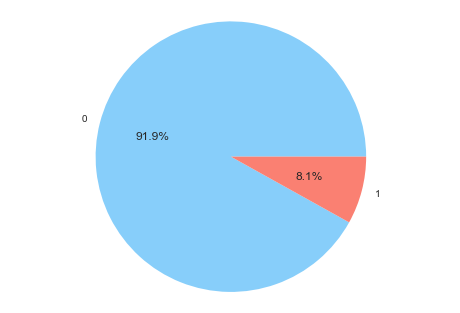

In [7]:
# Draw a graph showing the percentage of classes 
fig, ax = plt.subplots()
ax.pie(train.TARGET.value_counts(),labels=train.TARGET.value_counts().index,autopct='%.1f%%',colors=['lightskyblue','salmon'])
ax.axis('equal')
plt.show()

# Problem 3
Defining issues <br\>
Please set multiple issues / questions of your own based on the overview of the data.

How probability of loan repayment associated with
1. Gender
2. Type of loan
3. Own real estate
4. Own a car
5. Income amount
6. Income type
7. Education
8. Family status
9. Days employed 
10. Occupation type
11. Housing type

12. Employment days vs loan takers
13. Income amount vs loan takers

# Problem 4
Data exploration

In [12]:
for i in range(len(train.columns)):
    print(train.columns[i])

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APART

# Question 1
how probability of loan repayment associated with gender

In [44]:
gender = train.CODE_GENDER.value_counts()
gender.index

Index(['F', 'M', 'XNA'], dtype='object')

In [37]:
gender_perc = train[['CODE_GENDER', 'TARGET']].groupby(['CODE_GENDER'],as_index=False).mean()
gender_perc

,CODE_GENDER,TARGET
0,F,0.069993
1,M,0.101419
2,XNA,0.000000


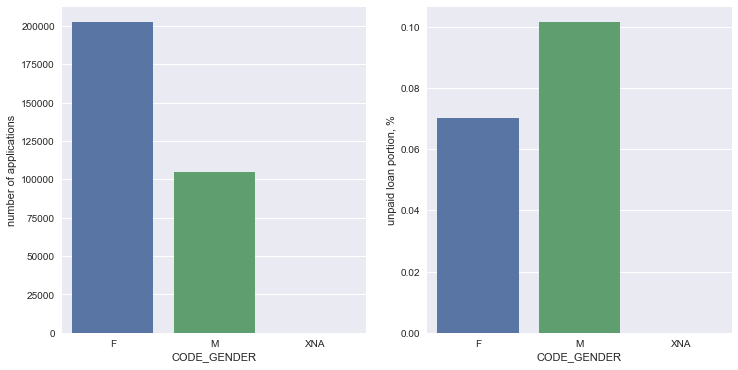

In [45]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
sns.barplot(ax=ax1,x=gender.index,y=gender.values)
ax1.set(xlabel='CODE_GENDER', ylabel='number of applications')
sns.barplot(ax=ax2,x=gender_perc.CODE_GENDER,y=gender_perc.TARGET)
ax2.set(ylabel='unpaid loan portion, %')
plt.show()

There are two times female clients on loan application than male. <br\>
Males (~10%) are most likely to not return the loan compared to females (~7%)

# Question 2
how likely the loan will be repayed depending on the type of the loan?

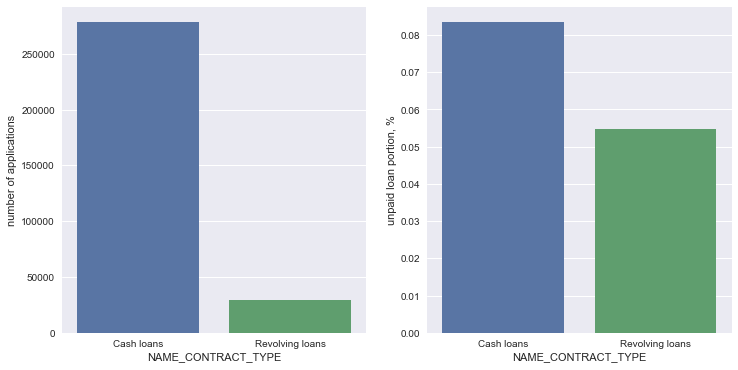

In [46]:
loty = train.NAME_CONTRACT_TYPE.value_counts()
loty_perc = train[['NAME_CONTRACT_TYPE', 'TARGET']].groupby(['NAME_CONTRACT_TYPE'],as_index=False).mean()
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
sns.barplot(ax=ax1,x=loty.index,y=loty.values)
ax1.set(xlabel='NAME_CONTRACT_TYPE', ylabel='number of applications')
sns.barplot(ax=ax2,x=loty_perc.NAME_CONTRACT_TYPE,y=loty_perc.TARGET)
ax2.set(ylabel='unpaid loan portion, %')
plt.show()

Revolving loans are only ~10% total loan applications, ~5% of Revolving loans are not paid and ~8% of the cash loans are not paid. In overal, revolving loans are most likely not repayed compared to cash loans. 

In [47]:
def plotbar(feature):
    loty = train[feature].value_counts()
    loty_perc = train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    sns.barplot(ax=ax1,x=loty.index,y=loty.values)
    ax1.set(xlabel=feature, ylabel='number of applications')
    sns.barplot(ax=ax2,x=loty_perc[feature],y=loty_perc.TARGET)
    ax2.set(ylabel='unpaid loan portion, %')
    plt.show()

# Question 3
How capability of loan repayment associated whether applicant has own the real estate?

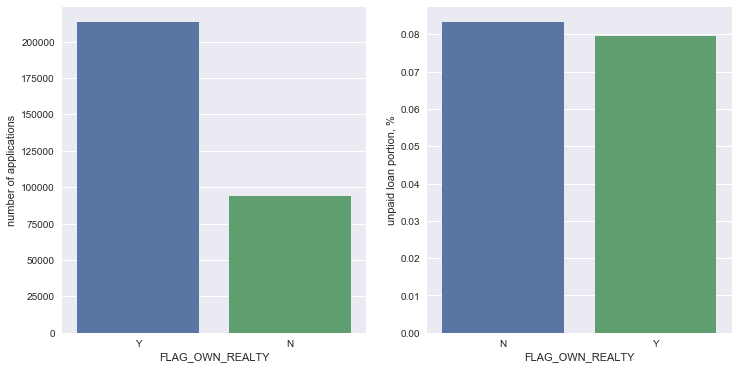

In [48]:
plotbar('FLAG_OWN_REALTY')

Clients with real estate are more apply for loan than ones without real estate. Repayment rate is similar for clients with and without real estate. 

# Question 4
How capability of loan repayment whether client own the car or not?

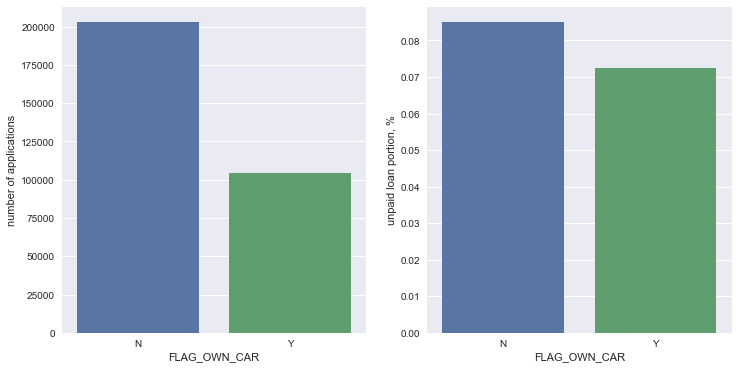

In [49]:
plotbar('FLAG_OWN_CAR')

Clients who own car are about double than ones without car. There are no significant difference between the repayment rate of clients with and without car. 

# Question 5
How probability of loan repayment associated with income type?

In [62]:
def plotbar1(feature):
    loty = train[feature].value_counts()
    loty_perc = train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10,12))
    sns.barplot(ax=ax1,x=loty.index,y=loty.values)
    ax1.set(xlabel=feature, ylabel='number of applications')
    sns.barplot(ax=ax2,x=loty_perc[feature],y=loty_perc.TARGET)
    ax2.set(ylabel='unpaid loan portion, %')
    plt.show()

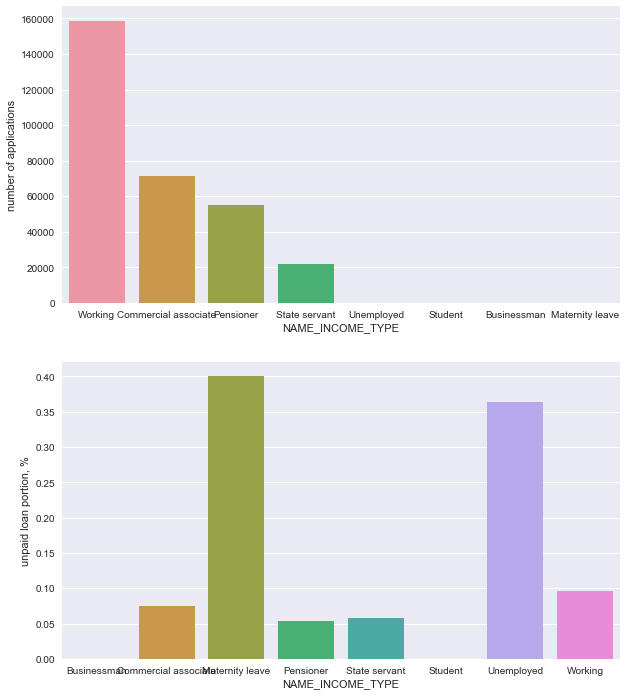

In [63]:
plotbar1('NAME_INCOME_TYPE')

Most loan applications from working people. Applicants with maternity leave are higher chance of not returning loans where 40% of applicants didn't repayed the loan. Unemployed people also most likely not to repay loan where ~36% of the unemployed applicants didn't repay the loan.  

# Question 6
Is there any relationship between education level and repayment capability?

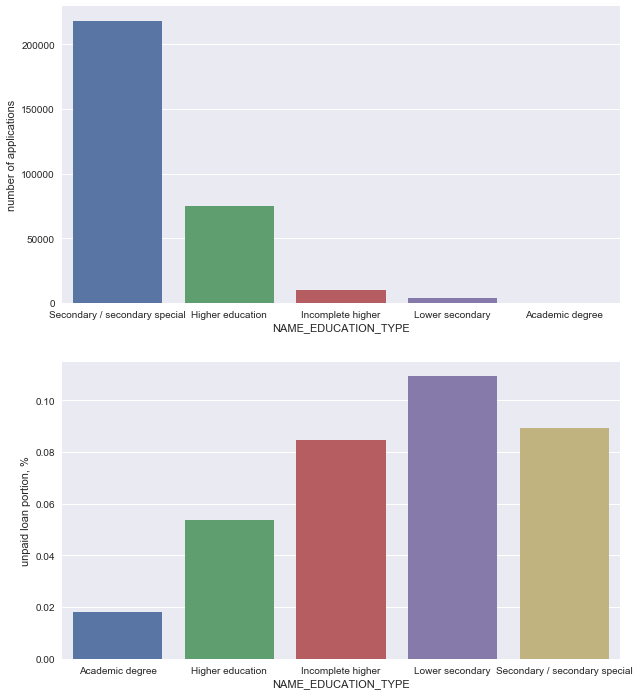

In [64]:
plotbar1('NAME_EDUCATION_TYPE')

Most loan takers are with secondary and secondary special education. There is obvious relatioship between the education level as seen in the graph. Even though small number of people with lower secondary education apply for loans, but not repayment rate is highest with 11%. And percentage of unpaid loan applications decrease with education level advances.   

# Question 7
Loan repayment vs. family status

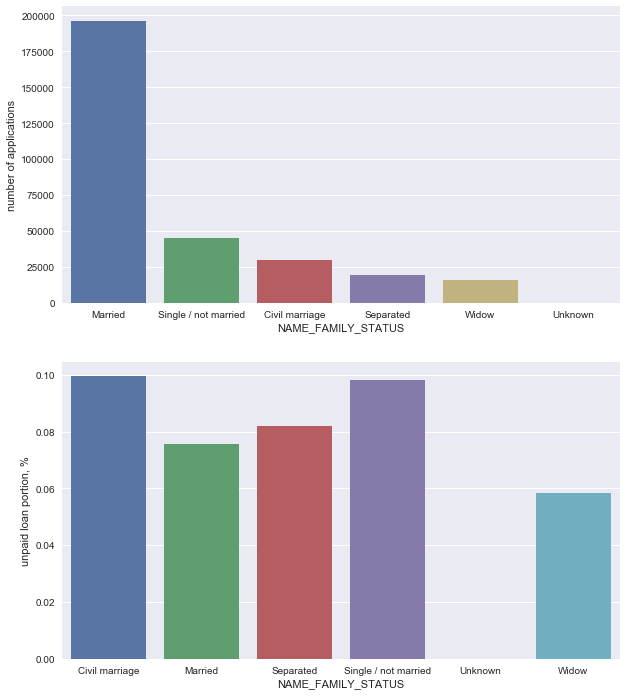

In [65]:
plotbar1('NAME_FAMILY_STATUS')

Most of the loan clients are married. <br\>
Civil marriage and single people are with high percentage of not repayment of loan, with ~10% each. 

# Question 8
Loan repayment vs. Occupation type

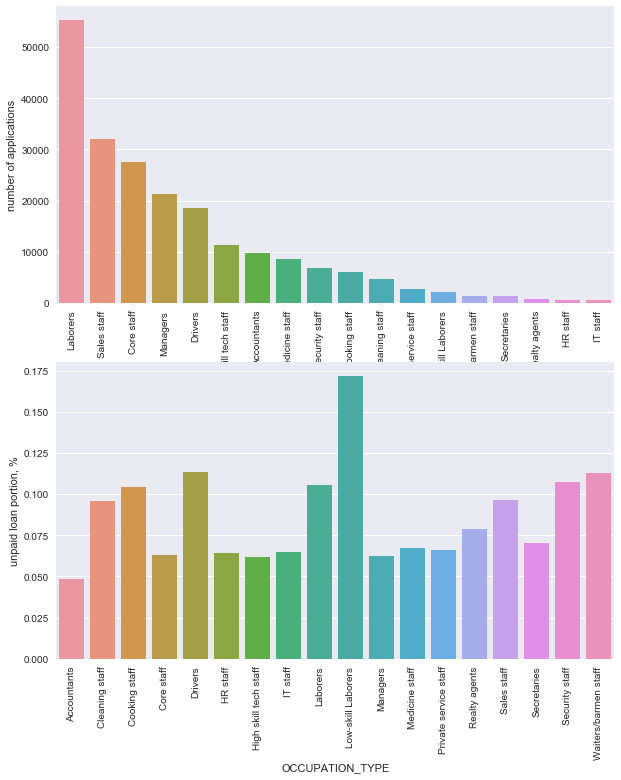

In [69]:
def plotbar2(feature):
    loty = train[feature].value_counts()
    loty_perc = train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10,12))
    sns.barplot(ax=ax1,x=loty.index,y=loty.values)
    ax1.set(xlabel=feature, ylabel='number of applications')
    ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
    sns.barplot(ax=ax2,x=loty_perc[feature],y=loty_perc.TARGET)
    ax2.set(ylabel='unpaid loan portion, %')
    ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
    plt.show()
plotbar2('OCCUPATION_TYPE')

Most loan takers are laborers. Occupation with the highest rate of unpaid loans islow-skill laborers. 

# Question 9
Loan repayment vs. housing type

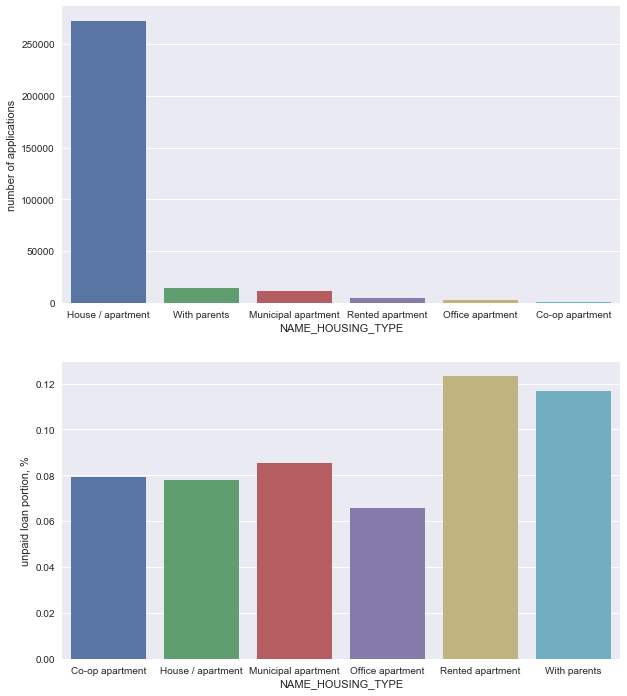

In [73]:
plotbar1('NAME_HOUSING_TYPE')

Most loan takers are lives in house/apartments. In terms of living condition, people with the highest rate of unpaid loans are live in rented apartments or with parents.  

# Question 10
Loan repayment vs. number of children

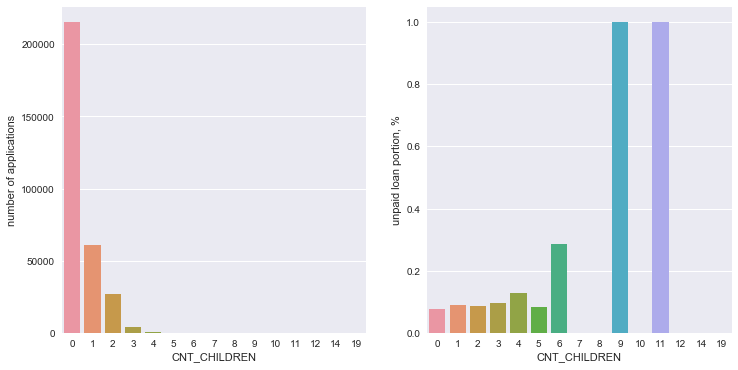

In [74]:
plotbar('CNT_CHILDREN')

Most loan takers are people without children. Unpaid loan rate increases with number of children increases. All applicants with 9 and 11 children didn't return the loan.  

# Question 11
Loan repayment vs. family members

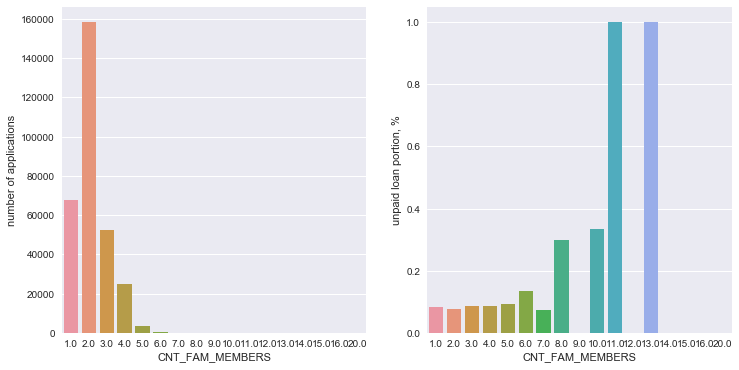

In [75]:
plotbar('CNT_FAM_MEMBERS')

Most loan takers have a family of two. <br\>
Similar to number of children, as the number of family members increase, the rate of unpaid loans increase. <br\>
All applicants with family of 11 and 13 didn't pay the loan. 

# Question 12
Loan takers vs. employed days

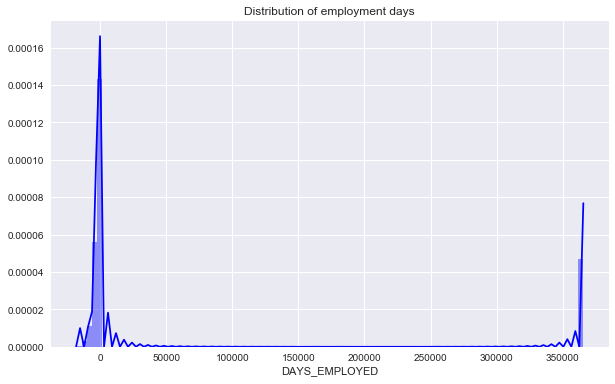

In [79]:
plt.figure(figsize=(10,6))
plt.title("Distribution of employment days")
sns.distplot(train['DAYS_EMPLOYED'],color='blue',bins=100)
plt.show()

Loan takers are mostly people with 10 years working experience. <br\>
Employment day in the dataset has some kind of mistyping or value error since there is great number of people with ~900years of working experience (~350000 days).

# Question 13
Income vs. loan takers

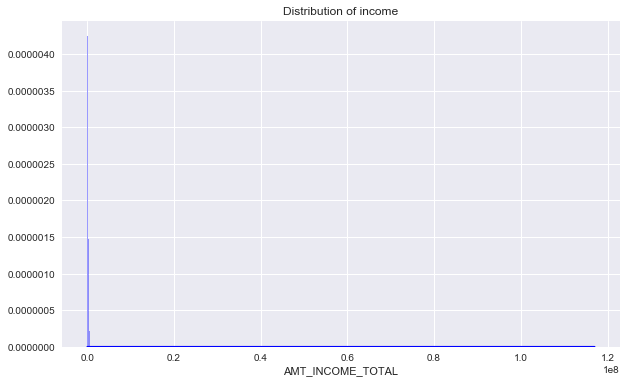

In [86]:
plt.figure(figsize=(10,6))
plt.title("Distribution of income")
sns.distplot(train['AMT_INCOME_TOTAL'],color='blue',bins=700)
plt.show()

Certainly, most loan takers are people with less total income.

# Question 14
Loan repayment vs. income

In [88]:
stat

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [ ]:
income = train[['AMT_INCOME_TOTAL', 'TARGET']]
income['AMT_INCOME_TOTAL'] = np.where((income.AMT_INCOME_TOTAL > stat.loc['mean'].AMT_INCOME_TOTAL),'higher','lower')

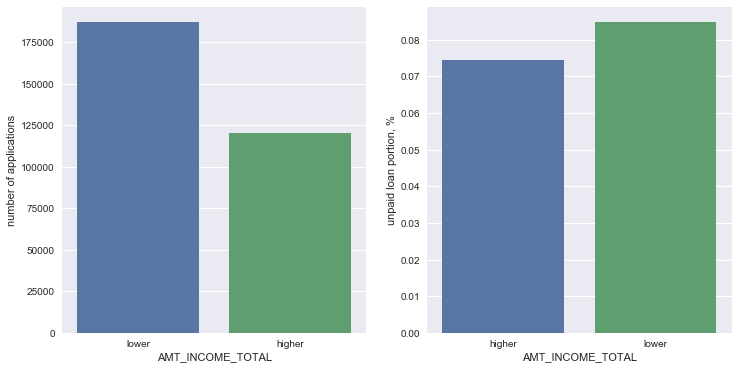

In [124]:
loty = income.AMT_INCOME_TOTAL.value_counts()
loty_perc = income.groupby(['AMT_INCOME_TOTAL'],as_index=False).mean()
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
sns.barplot(ax=ax1,x=loty.index,y=loty.values)
ax1.set(xlabel='AMT_INCOME_TOTAL', ylabel='number of applications')
sns.barplot(ax=ax2,x=loty_perc.AMT_INCOME_TOTAL,y=loty_perc.TARGET)
ax2.set(ylabel='unpaid loan portion, %')
plt.show()

There is no significant difference in the income vs loan repayment relative to the mean of income 168'797. 

# Question 15
Organization type

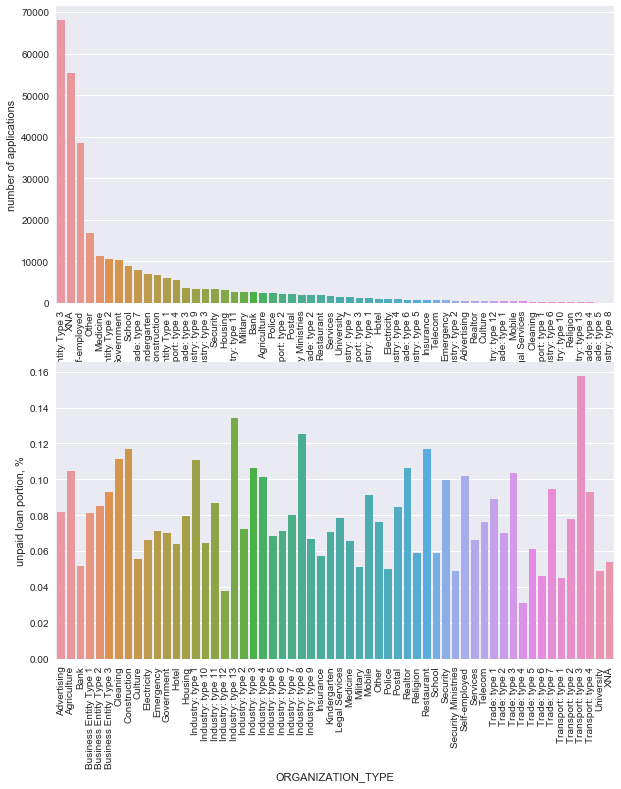

In [125]:
plotbar2('ORGANIZATION_TYPE')

Transport type 3 has the highest rate of not repayed loans around ~16%. Most loan takers are in Business entity type 3. 